# ADTA 5560: Recurrent Neural Networks for Sequence Data
Thuan L Nguyen, PhD

# Final Project by Yog Chaudhary 

In [1]:
#Import Basic Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#For timeseries RNN LSTM neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import tensorflow as tf

2024-12-07 21:25:28.640285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-07 21:25:28.640359: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#Import Keras:TimeseriesGenerator
#This produces timeseries batches used on training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#Import Keras:MinMaxScaler
#This is used to scale the data
from sklearn.preprocessing import MinMaxScaler

### Load Dataset PB

In [4]:
# Loading Dataset FB

df_ALL=pd.read_csv("FB.csv")

In [5]:
# Shows first five rows of the dataset

df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


### Brief Exploratory Data Analysis (EDA)

In [6]:
# This gives total rows and columns in dataset

df_ALL.shape

(1980, 7)

In [7]:
# Out of 7 columns consider only one column

df = df_ALL[[ 'Close']]

In [8]:
df.shape

(1980, 1)

In [9]:
# Datatypes of all the columns

df.dtypes

Close    float64
dtype: object

In [10]:
# Statistics Summary

df.describe()

,Close
count,1980.000000
mean,112.312207
std,58.133793
min,17.730000
25%,64.762499
50%,113.810001
75%,168.085003
max,223.229996


In [11]:
df.head()

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999


<AxesSubplot:>

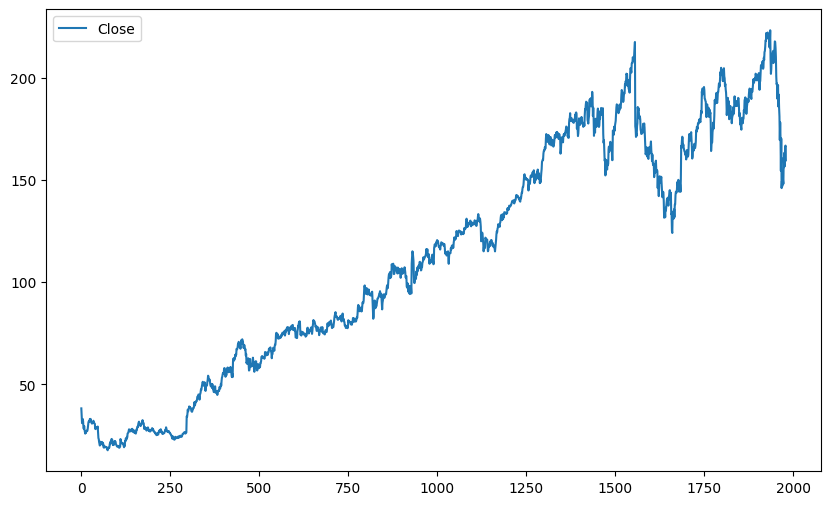

In [12]:
# Visualization

df.plot(figsize=(10,6))

### Length of Input Time Series-Number of Input Time Steps

In [13]:
# set the length of the input sequence
# Use 60 historical data points to predict the next one

length60=60

In [14]:
# Print

length60

60

### Time Series Dataset: Train/Test Split

In [15]:
# Length of the dataset

len(df)

1980

In [16]:
# Set percentage of dataset used for testing

test_percent=0.1

In [17]:
# Number of datapoints taken for testing the model

len(df)*test_percent

198.0

### Split Data --Train/Test

In [18]:
# need to find the length of the testing dataset

test_length=np.round(len(df)*test_percent)
test_length

198.0

In [19]:
# Testing dataset starts at this index

split_index=int(len(df)-test_length)
split_index

1782

In [20]:
# Create seperate training/testing datasets

# Trainng dataset= all indices from start to split_index

data_train=df.iloc[: split_index]

# Trainng dataset= all indices from  split_index-length60 to end of the dataframe

data_test=df.iloc[split_index-length60 :]


In [21]:
# Give first five rows of training data

data_train.head(5)

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999


In [22]:
# Give last five rows of training data

data_train.tail(5)

,Close
1777,177.470001
1778,181.330002
1779,189.009995
1780,188.470001
1781,187.479996


In [23]:
# Give first five rows of testing data

data_test.head(5)

,Close
1722,167.679993
1723,165.869995
1724,165.550003
1725,166.690002
1726,168.699997


In [24]:
# Give last five rows of testing data

data_test.tail(5)

,Close
1975,163.339996
1976,156.789993
1977,165.949997
1978,166.800003
1979,159.600006


### Normalize Data (Scale it into the range [0,1])

In [25]:
# Create a MinMaxScaler to normalize the data

scaler=MinMaxScaler()

In [26]:
# Only scale the training data 

# Train the scaler to perform normalization

scaler.fit(data_train)

MinMaxScaler()

In [27]:
# Normalize the training dataset

normalized_train=scaler.transform(data_train)

# Normalize the testing dataset

normalized_test=scaler.transform(data_test)

### Create TimeseriesGenerator for training

In [28]:
# batch_size:Number of time series samples in each batch

batch_size32=32

In [29]:
# Create TimeseriesGenerator for training:train_tsGenerator

train_tsGenerator60=TimeseriesGenerator(normalized_train,normalized_train,length=length60,batch_size=batch_size32)

In [30]:
len(normalized_train)

1782

In [31]:
len(train_tsGenerator60)

54

In [32]:
# What does the first batch look like

x,y=train_tsGenerator60[0]

In [33]:
print(x)

[[[0.10261801]
  [0.08159383]
  [0.06642639]
  ...
  [0.01641889]
  [0.02042349]
  [0.01937228]]

 [[0.08159383]
  [0.06642639]
  [0.07143215]
  ...
  [0.02042349]
  [0.01937228]
  [0.01326525]]

 [[0.06642639]
  [0.07143215]
  [0.07658807]
  ...
  [0.01937228]
  [0.01326525]
  [0.01736998]]

 ...

 [[0.06692697]
  [0.06527507]
  [0.06742755]
  ...
  [0.02432798]
  [0.02567954]
  [0.01531762]]

 [[0.06527507]
  [0.06742755]
  [0.06877909]
  ...
  [0.02567954]
  [0.01531762]
  [0.01276469]]

 [[0.06742755]
  [0.06877909]
  [0.07008059]
  ...
  [0.01531762]
  [0.01276469]
  [0.01446664]]]


In [34]:
print(y)

[[0.01326525]
 [0.01736998]
 [0.01071233]
 [0.0066076 ]
 [0.01141313]
 [0.00715823]
 [0.00855985]
 [0.00855985]
 [0.00840967]
 [0.00710817]
 [0.00805927]
 [0.00685789]
 [0.00680783]
 [0.0016519 ]
 [0.        ]
 [0.0042549 ]
 [0.00615708]
 [0.0062572 ]
 [0.00540622]
 [0.00850979]
 [0.01601842]
 [0.01491715]
 [0.02137458]
 [0.01897182]
 [0.02072384]
 [0.02783201]
 [0.02432798]
 [0.02567954]
 [0.01531762]
 [0.01276469]
 [0.01446664]
 [0.01296491]]


## Build, Train and Test Model

### Build LSTM Model

In [35]:
# Only using one feature: close price

n_features=1

In [36]:
# Define model

model=Sequential()

# Add an LSTM layer
# This layer has 50 LSTM cells

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60,n_features)))

# Dropout layer
model.add(Dropout(0.2))

# Add 2nd LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Dropout layer
model.add(Dropout(0.2))

# Add 3rd LSTM layer
model.add(LSTM(units=50, activation='relu'))

# Add a fully connected layer for the final prediction
model.add(Dense(1))



2024-12-07 21:25:31.117806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-07 21:25:31.117843: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-07 21:25:31.117876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tf2-keras-ann-vm): /proc/driver/nvidia/version does not exist
2024-12-07 21:25:31.118140: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile model


In [37]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

### Train (Fit) Model using fit_generator()

In [38]:
# Train the model

model.fit(train_tsGenerator60, epochs=100)


Epoch 1/100
54/54 [==============================] - 7s 77ms/step - loss: 0.0611
Epoch 2/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0071
Epoch 3/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0052
Epoch 4/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0068
Epoch 5/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0019
Epoch 6/100
54/54 [==============================] - 4s 79ms/step - loss: 0.0023
Epoch 7/100
54/54 [==============================] - 6s 108ms/step - loss: 0.0019
Epoch 8/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0024
Epoch 9/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0018
Epoch 10/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0018
Epoch 11/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0019
Epoch 12/100
54/54 [==============================] - 4s 77ms/step - loss: 0.0021
Epoch 13/100
54/54 [====

### Visualize Model's performance after Training

In [39]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

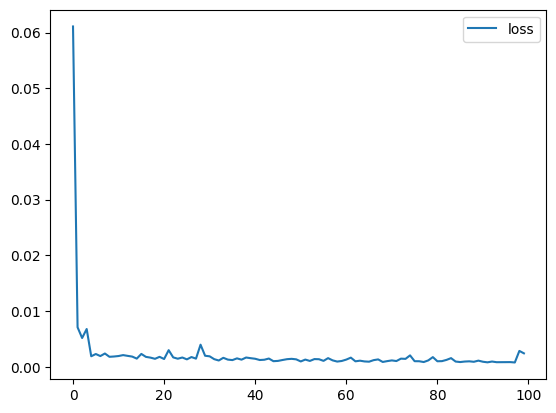

In [40]:
# Load the loss data into a dataframe
df_model_loss=pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()
df_model_loss.plot()

## Prediction for Testing: Using TimeSeriesGenerator

### Create TimeSeriesGenerator for Testing

In [41]:
batch_size1=1

# test_tsGenerator

test_tsGenerator60=TimeseriesGenerator(normalized_test,normalized_test,length=length60,batch_size=batch_size1)

### Predict Future Data Points for Testing

In [42]:
normalized_prediction=model.predict(test_tsGenerator60)

In [43]:
normalized_prediction

array([[0.82119095],
       [0.82991934],
       [0.83813065],
       [0.84575677],
       [0.85091805],
       [0.853645  ],
       [0.854939  ],
       [0.8565743 ],
       [0.85850775],
       [0.8612428 ],
       [0.8650727 ],
       [0.86899275],
       [0.8722954 ],
       [0.8760708 ],
       [0.8810734 ],
       [0.8859371 ],
       [0.8914905 ],
       [0.89657706],
       [0.9007643 ],
       [0.9031225 ],
       [0.903659  ],
       [0.9022602 ],
       [0.9010392 ],
       [0.9003406 ],
       [0.9009953 ],
       [0.90103483],
       [0.9002591 ],
       [0.89766836],
       [0.89445734],
       [0.89028585],
       [0.88543737],
       [0.87949413],
       [0.8712819 ],
       [0.8626287 ],
       [0.8548174 ],
       [0.8502955 ],
       [0.84779507],
       [0.84597427],
       [0.8456519 ],
       [0.8433664 ],
       [0.8406555 ],
       [0.8383095 ],
       [0.8373499 ],
       [0.836686  ],
       [0.8361059 ],
       [0.8350345 ],
       [0.832369  ],
       [0.829

In [44]:
len(normalized_prediction)

198

In [45]:
# convert normlized predictions back to the true values

prediction=scaler.inverse_transform(normalized_prediction)

In [46]:
# Flatten the 2D array

prediction_index = np.arange(1, 76, step=1)

df_prediction = pd.DataFrame(data=prediction, columns=['Prediction'])

In [47]:
df_prediction

,Prediction
0,181.779327
1,183.522995
2,185.163361
3,186.686829
4,187.717911
...,...
193,157.869125
194,158.208557
195,158.803513
196,159.926682


### Visualize Prediction

<AxesSubplot:>

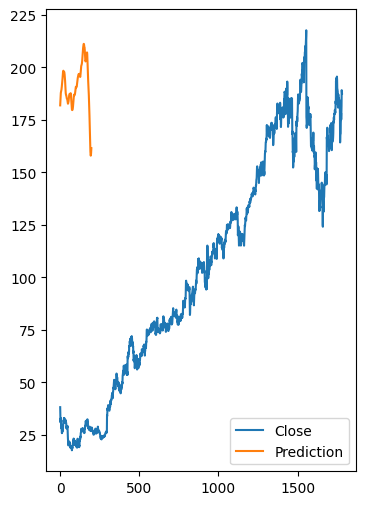

In [48]:
ax=data_train.plot()

df_prediction.plot(ax=ax, figsize=(4,6))

### Preprocess Full Input Dataset

In [49]:
# Still use minmaxscaler to normalize the full input dataset df

full_scaler=MinMaxScaler()
normalized_full_data=full_scaler.fit_transform(df)

### Create TimeSeriesGenerator for Forecasting

In [50]:
length60

60

In [51]:
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data,normalized_full_data,length=length60,batch_size=batch_size32)

### Build, Compile and Fit LSTM Model for Forecasting


In [52]:
model.fit_generator(forecast_tsGenerator, epochs = 100)

Epoch 1/100
 2/60 [>.............................] - ETA: 4s - loss: 0.0020

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


60/60 [==============================] - 4s 74ms/step - loss: 0.0011
Epoch 2/100
60/60 [==============================] - 4s 73ms/step - loss: 0.0012
Epoch 3/100
60/60 [==============================] - 4s 73ms/step - loss: 0.0011
Epoch 4/100
60/60 [==============================] - 4s 74ms/step - loss: 0.0012
Epoch 5/100
60/60 [==============================] - 6s 100ms/step - loss: 9.2411e-04
Epoch 6/100
60/60 [==============================] - 4s 74ms/step - loss: 9.6470e-04
Epoch 7/100
60/60 [==============================] - 4s 74ms/step - loss: 0.0014
Epoch 8/100
60/60 [==============================] - 4s 73ms/step - loss: 9.4863e-04
Epoch 9/100
60/60 [==============================] - 4s 74ms/step - loss: 9.3073e-04
Epoch 10/100
60/60 [==============================] - 4s 74ms/step - loss: 9.9311e-04
Epoch 11/100
60/60 [==============================] - 5s 75ms/step - loss: 9.6337e-04
Epoch 12/100
60/60 [==============================] - 4s 74ms/step - loss: 7.9825e-04
Epoch 13

### Time Series Forecast Using LSTM Neural Network 

In [53]:
forecast=[]

periods=500
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):
    
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Inverse to Transform Normalized data back into True Values

In [54]:
forecast=full_scaler.inverse_transform(forecast)

forecast

array([[162.98746203],
       [162.98116617],
       [162.68257829],
       [162.32174223],
       [162.00475672],
       [161.76757185],
       [161.61109401],
       [161.52202107],
       [161.48324151],
       [161.47870947],
       [161.49504931],
       [161.52210681],
       [161.55259396],
       [161.58192973],
       [161.60749288],
       [161.62821777],
       [161.64403091],
       [161.65552024],
       [161.66355542],
       [161.66905511],
       [161.67295022],
       [161.67586542],
       [161.67841316],
       [161.68093641],
       [161.68365563],
       [161.68664433],
       [161.68998824],
       [161.69357712],
       [161.69747222],
       [161.70148982],
       [161.70564214],
       [161.70985572],
       [161.71409378],
       [161.71833185],
       [161.72253318],
       [161.72671   ],
       [161.73088683],
       [161.73500241],
       [161.73910574],
       [161.74318458],
       [161.74725116],
       [161.75131775],
       [161.75533534],
       [161

In [55]:
df

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999
...,...
1975,163.339996
1976,156.789993
1977,165.949997
1978,166.800003


### Creating new timestamp index with pandas

In [56]:
forecast_index=np.arange(1980,2227,step=1)

In [57]:
forecast_df=pd.DataFrame(data=forecast,columns=['Forecast'])

In [58]:
forecast_df

,Forecast
0,162.987462
1,162.981166
2,162.682578
3,162.321742
4,162.004757
...,...
495,162.807614
496,162.808569
497,162.809549
498,162.810517


### Plot the Forecast

<AxesSubplot:>

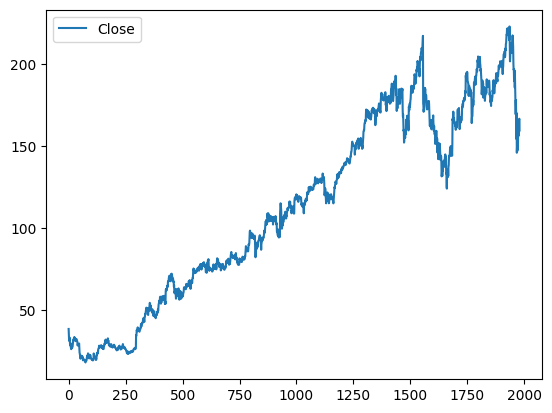

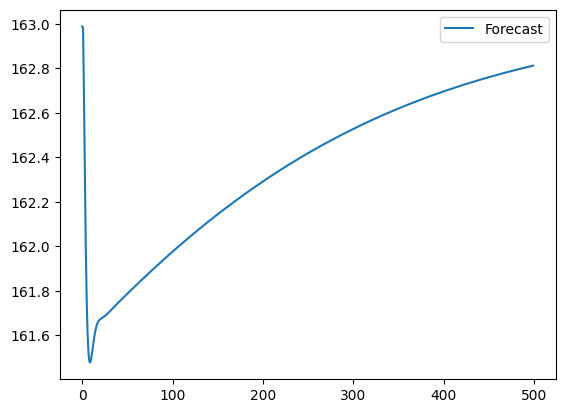

In [59]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

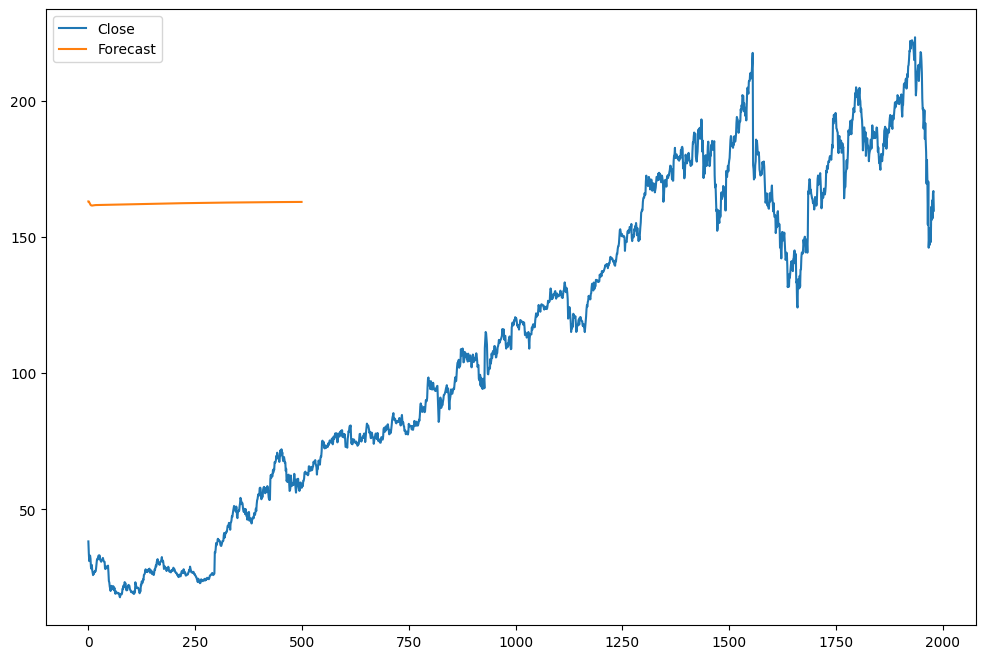

In [60]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [61]:
# Thank you 